# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:


api_key = "be3e264cb040dab2ab5013d13c51bec8"
url = 'https://api.openweathermap.org/data/2.5/weather'

city_data = []

print("Beginning Data Retrieval")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = f"{url}?q={city}&appid={api_key}"

    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    record_count += 1

    try:
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | isle of lewis
City not found. Skipping...
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | nadi
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | algeciras
Processing Record 10 of Set 1 | hanceville
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | hammerfest
Processing Record 13 of Set 1 | tual
Processing Record 14 of Set 1 | selfoss
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | chonchi
Processing Record 17 of Set 1 | kabare
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | lihue


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,277.62,83,90,17.48,TF,1704237042
1,bethel,41.3712,-73.4140,276.08,68,0,1.54,US,1704237043
2,adamstown,-25.0660,-130.1015,297.84,73,98,1.26,PN,1704237043
3,nadi,-17.8000,177.4167,303.15,66,20,5.14,FJ,1704237044
4,lebu,-37.6167,-73.6500,288.55,85,16,8.06,CL,1704237045


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/demetriahorton/PythonStuff/python-api-challenge/__pycache__/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("/Users/demetriahorton/PythonStuff/python-api-challenge/__pycache__/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,port-aux-francais,-49.3500,70.2167,277.62,83,90,17.48,TF,1704237042
1,1,bethel,41.3712,-73.4140,276.08,68,0,1.54,US,1704237043
2,2,adamstown,-25.0660,-130.1015,297.84,73,98,1.26,PN,1704237043
3,3,nadi,-17.8000,177.4167,303.15,66,20,5.14,FJ,1704237044
4,4,lebu,-37.6167,-73.6500,288.55,85,16,8.06,CL,1704237045


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

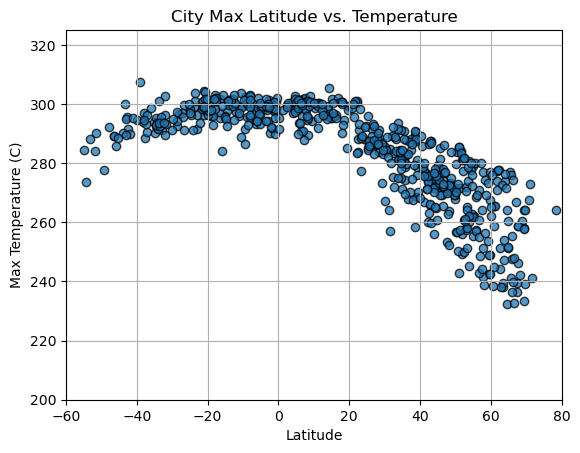

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlim(-60, 80)
plt.ylim(200, 325)
plt.grid(True)


# Save the figure
plt.savefig("/Users/demetriahorton/PythonStuff/python-api-challenge/__pycache__/")

# Show plot
plt.show()

#### Latitude Vs. Humidity

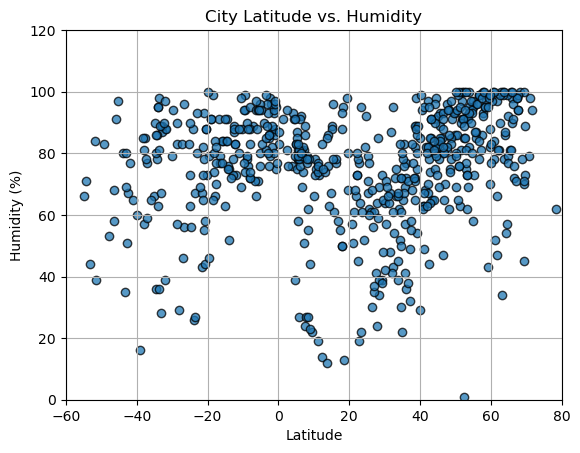

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-60, 80)
plt.ylim(0, 120)
plt.grid(True)


# Save the figure
plt.savefig("/Users/demetriahorton/PythonStuff/python-api-challenge/__pycache__/scatter_plot.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

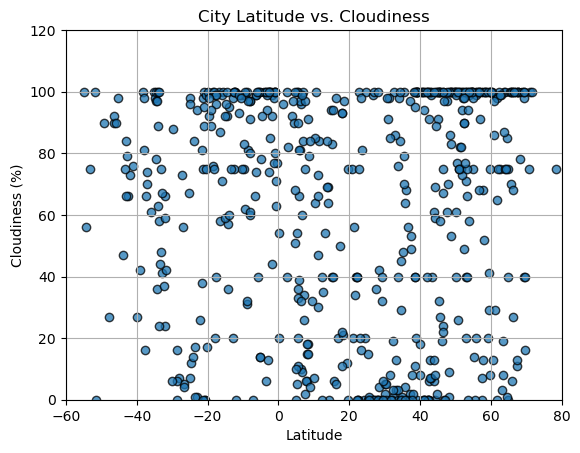

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-60, 80)
plt.ylim(0, 120)
plt.grid(True)

# Save the figure
plt.savefig("/Users/demetriahorton/PythonStuff/python-api-challenge/__pycache__/scatter_plot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

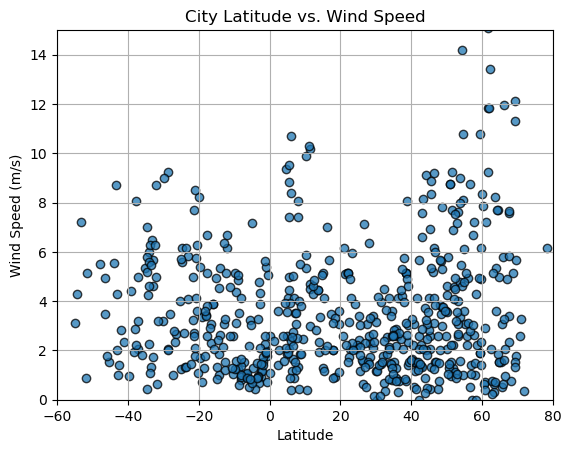

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.xlim(-60, 80)
plt.ylim(0, 15)
plt.grid(True)

# Save the figure
plt.savefig("/Users/demetriahorton/PythonStuff/python-api-challenge/__pycache__/scatter_plot.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept
    
    plt.scatter(x, y)
    plt.plot(x, regression_line, color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression')
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,bethel,41.3712,-73.4140,276.08,68,0,1.54,US,1704237043
6,6,albany,42.6001,-73.9662,273.64,78,6,1.36,US,1704237036
7,7,algeciras,36.1333,-5.4505,287.97,77,68,4.12,ES,1704237046
8,8,hanceville,34.0607,-86.7675,281.23,62,98,1.50,US,1704237046
9,9,iqaluit,63.7506,-68.5145,254.00,78,100,8.23,CA,1704236906


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,port-aux-francais,-49.3500,70.2167,277.62,83,90,17.48,TF,1704237042
2,2,adamstown,-25.0660,-130.1015,297.84,73,98,1.26,PN,1704237043
3,3,nadi,-17.8000,177.4167,303.15,66,20,5.14,FJ,1704237044
4,4,lebu,-37.6167,-73.6500,288.55,85,16,8.06,CL,1704237045
5,5,new norfolk,-42.7826,147.0587,295.77,51,79,1.00,AU,1704237045


###  Temperature vs. Latitude Linear Regression Plot

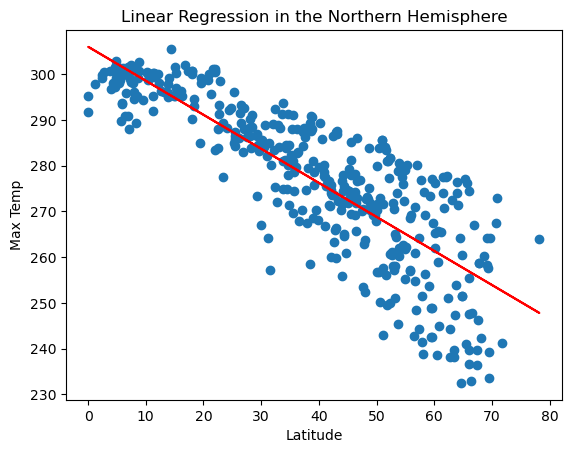

R-value: -0.8367026485935735


In [34]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print the regression results
regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear Regression in the Northern Hemisphere')
plt.show()
print("R-value:", r_value)


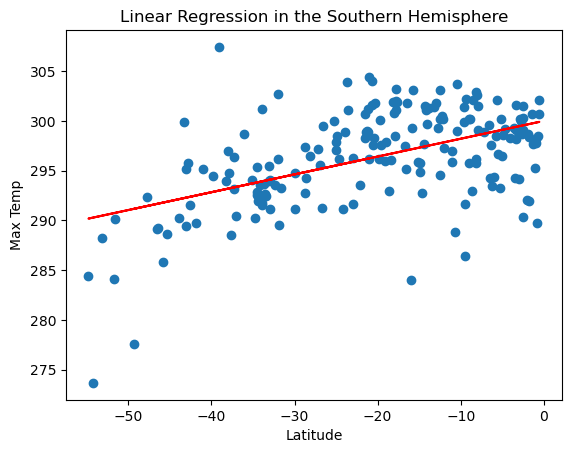

R-value: 0.5157672330426488


In [33]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line
regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear Regression in the Southern Hemisphere')
plt.show()

# Print the regression results
print("R-value:", r_value)



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

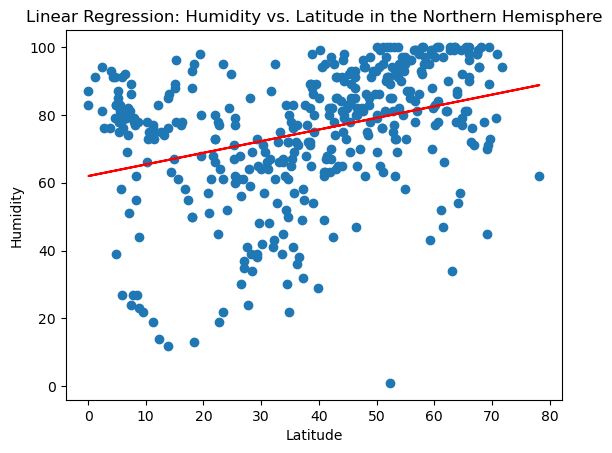

R-value: 0.3372562732935527


In [35]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line
regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression: Humidity vs. Latitude in the Northern Hemisphere')
plt.show()

# Print the regression results
print("R-value:", r_value)


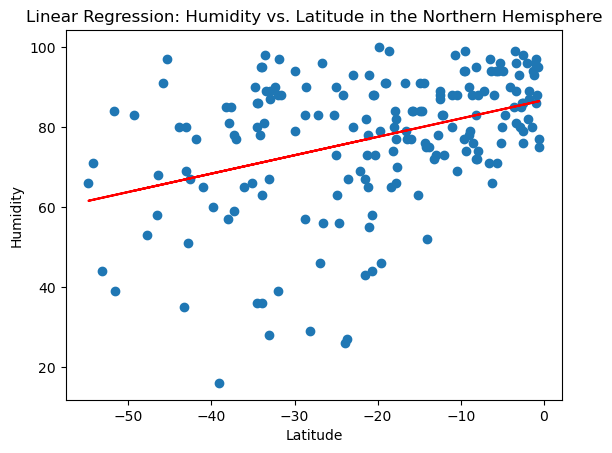

R-value: 0.3879780722402735


In [36]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line
regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression: Humidity vs. Latitude in the Southern Hemisphere')
plt.show()

# Print the regression results
print("R-value:", r_value)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

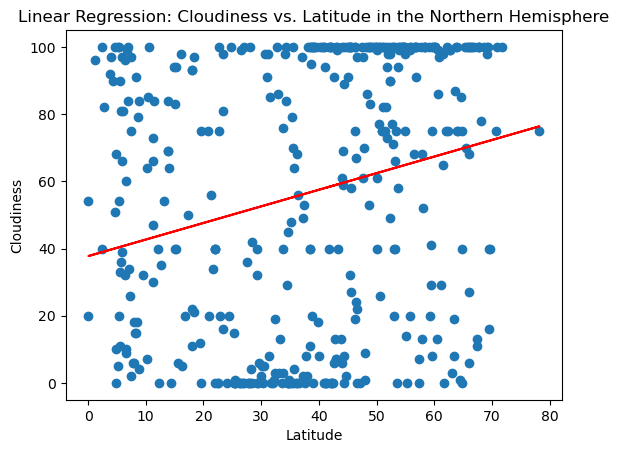

R-value: 0.23773998301283716


In [38]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line
regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression: Cloudiness vs. Latitude in the Northern Hemisphere')
plt.show()

# Print the regression results
print("R-value:", r_value)


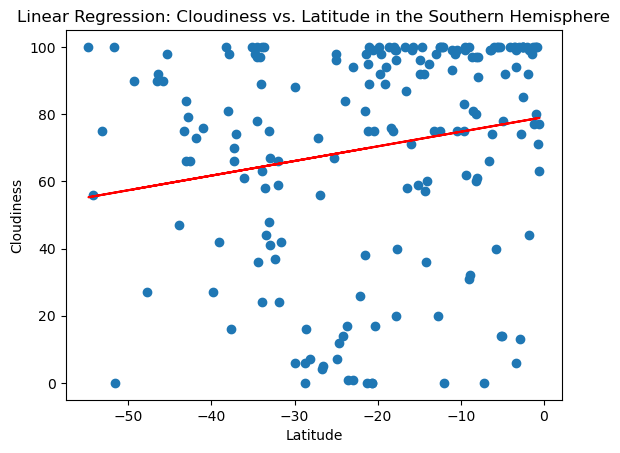

R-value: 0.1892802434634636


In [40]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line
regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression: Cloudiness vs. Latitude in the Southern Hemisphere')
plt.show()

# Print the regression results
print("R-value:", r_value)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

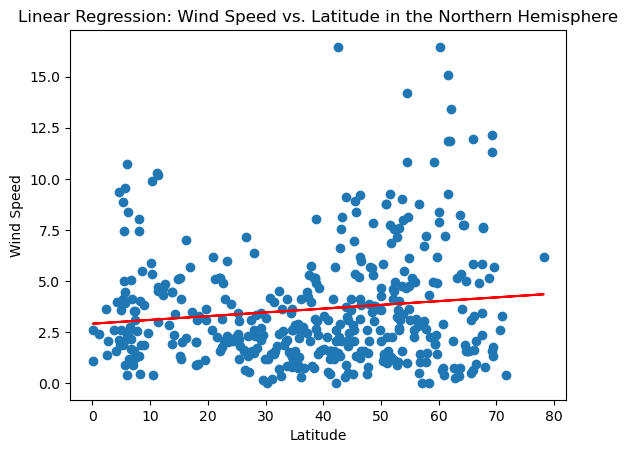

R-value: 0.12476929639910042


In [41]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line
regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression: Wind Speed vs. Latitude in the Northern Hemisphere')
plt.show()

# Print the regression results
print("R-value:", r_value)

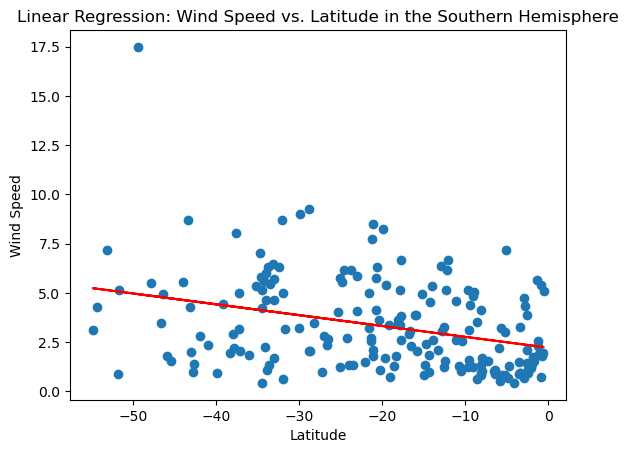

R-value: -0.33093114409215824


In [42]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line
regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression: Wind Speed vs. Latitude in the Southern Hemisphere')
plt.show()

# Print the regression results
print("R-value:", r_value)

**Discussion about the linear relationship:** YOUR RESPONSE HERE